In [154]:
import pandas as pd
import matplotlib.pyplot as plt

In [155]:
dataframe = pd.read_csv("new/my_database.csv")

In [156]:
dataframe.head()

,DateTime,Temperature,Humidity,LightVal,MoistureVal
0,Fri_Nov_19_07-41-17_2021,11,64,413,88
1,Fri_Nov_19_07-42-48_2021,11,64,114,86
2,Fri_Nov_19_07-43-19_2021,11,63,313,86
3,Fri_Nov_19_07-51-10_2021,11,62,119,84
4,Fri_Nov_19_07-51-41_2021,11,64,249,82


In [157]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DateTime     82 non-null     object
 1   Temperature  82 non-null     int64 
 2   Humidity     82 non-null     int64 
 3   LightVal     82 non-null     int64 
 4   MoistureVal  82 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.3+ KB


In [158]:
array_size = light_values.size-1


In [159]:
# ADC = analog read value of LDR

# Vout = ADC*(Vin/1024) = ADC * 0.0048828125

# resistance value of ldr : Rldr = (10*5-Vout)/Vout

# Lux = 500/Rldr

# LUX = LUX*1000

light_values = dataframe.LightVal

LUX = [0]*array_size
for i in range(0,array_size):
    value = light_values[i]
    if value != 0:
        ADC = value

        Vout = ADC*0.0048828125

        Rldr = (10*(5-Vout))/Vout

        LUX[i] = 500.0/Rldr

        LUX[i] = LUX[i]*1000
        LUX[i] = round(LUX[i],0)
    else:
        LUX[i] = 0
        LUX[i] = round(LUX[i],0)

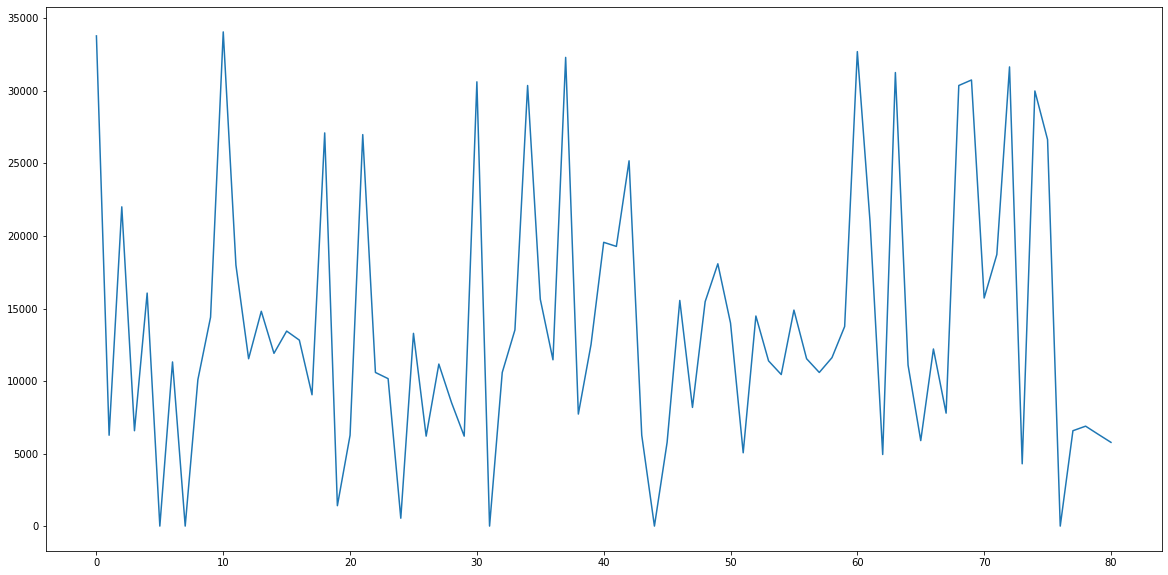

In [160]:
x_axis = [0] * array_size
for i in range(0,array_size):
    x_axis[i] = i


fig, ax = plt.subplots(figsize=(20,10))
plt.plot(x_axis,LUX)
plt.show()


In [161]:
# soil_moisture is Resistance

# resistance increase -> soil moisture % decrease

# soil moisture % = 100 - (value/10.24) as analog read values range from 0 to 1024

soil_moisture = dataframe.MoistureVal

SOIL = [0]*array_size
for i in range(0,array_size):
    value = soil_moisture[i]
    SOIL[i] = 100 - (value/10.24)
    SOIL[i] = round(SOIL[i],1)

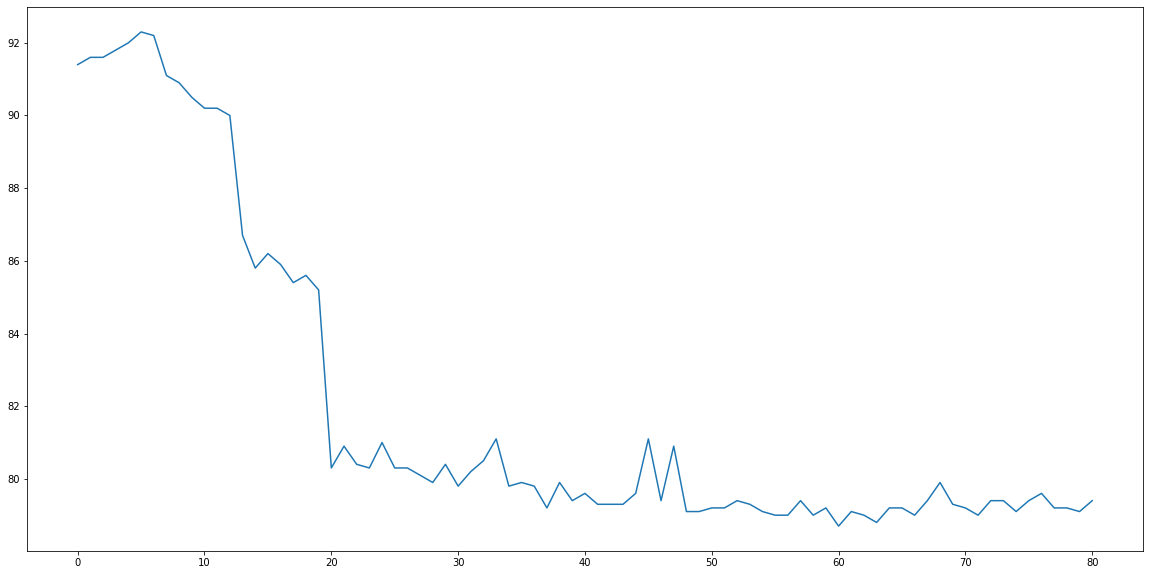

In [162]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(x_axis,SOIL)
plt.show()


In [171]:
new_df = pd.read_csv("new/updated.csv")

In [173]:
new_df.head()

,Id,DateTime,Temperature,Humidity,LightVal,MoistureVal
0,1,Fri_Nov_19_07-41-17_2021,11,64,33797.054010,91.406250
1,2,Fri_Nov_19_07-42-48_2021,11,64,6263.736264,91.601562
2,3,Fri_Nov_19_07-43-19_2021,11,63,22011.251758,91.601562
3,4,Fri_Nov_19_07-51-10_2021,11,62,6574.585635,91.796875
4,5,Fri_Nov_19_07-51-41_2021,11,64,16064.516129,91.992188


In [177]:
new_df.LightVal = LUX
new_df.MoistureVal = SOIL

In [183]:
new_df.to_csv("new/updated.csv")